# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar EDA and visualization process as what we did in the FTE. Create at least 2 EDA plots, and create a HTML file with an auto-EDA analysis using pandas-profiling or another auto-EDA Python package. Write a short analysis at the end of the assignment in markdown. 

## Data science process steps this week
We will carry out the first two parts of the CRISP-DM data science process this week:

1. Business understanding

This is customer churn data for a telecommunications company. Customers can have phone as well as other services. The company is looking to reduce customer churn, where customers stop using the company's services and cancel their account. The 'Churn' column has a binary target, yes or no, that denotes if a customer churned. We want to create a machine learning model to predict the Churn target using the other available data in the dataset. Ideally, we will deploy this model to integrate with the company's database, so that a churn risk column is created for each customer. This will enable customer service reps and others to devise and use strategies to reduce churn.


2. Data understanding

Carry out some EDA as we did in the FTE, such as using pandas-profiling. Create a histogram like we did in the FTE, where we plot a numeric column with the target as the 'hue'. Optional challenge: create other plots with the target as the hue, such as bar plots for the categorical columns.

In [1]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


# Package installation above, please start here

In [2]:
# importing ProfileReport
from ydata_profiling import ProfileReport

## Import CSV file to Dataframe

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/johnxie301/Desktop/Data Science 600/Assignment 1/churn_data.csv')
df.head(5)

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


# Churn_data html file created

In [16]:
profile = ProfileReport(df, title = 'Churn_data')
profile.to_file('churn_data1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [5]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [6]:
df.value_counts(['Contract','PaymentMethod'])

Contract        PaymentMethod            
Month-to-month  Electronic check             1850
                Mailed check                  893
                Bank transfer (automatic)     589
Two year        Credit card (automatic)       581
                Bank transfer (automatic)     564
Month-to-month  Credit card (automatic)       543
One year        Credit card (automatic)       398
                Bank transfer (automatic)     391
Two year        Mailed check                  382
One year        Electronic check              347
                Mailed check                  337
Two year        Electronic check              168
Name: count, dtype: int64

# types of contract and forms of payments

<Axes: xlabel='Contract,PaymentMethod'>

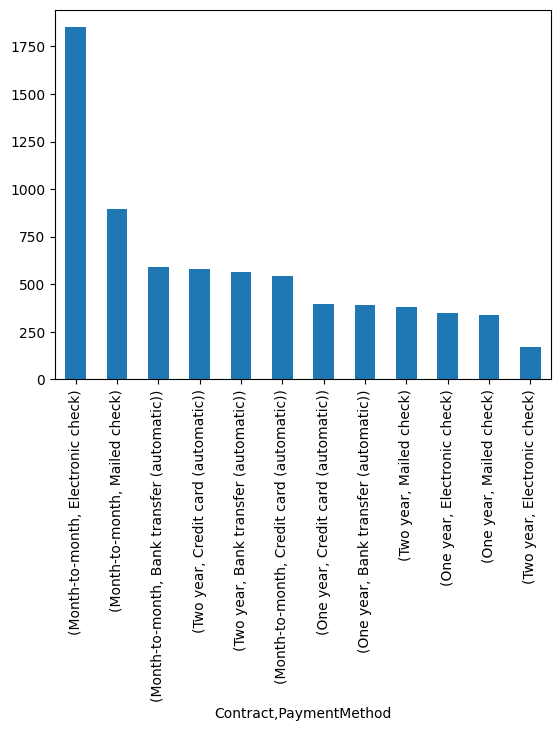

In [7]:
df.value_counts(['Contract','PaymentMethod']).plot.bar()

In [8]:
import phik
import seaborn as sns



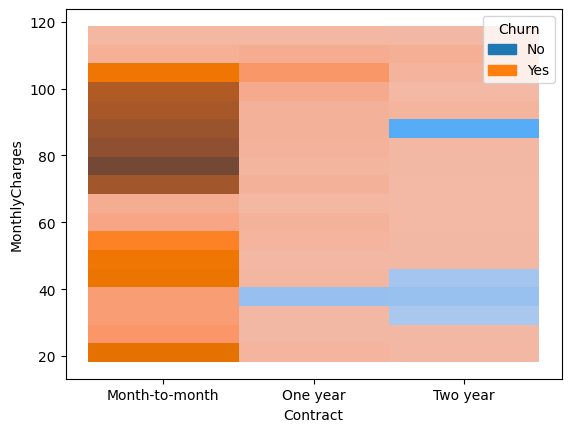

In [9]:
a  = sns.histplot(data=df,y="MonthlyCharges", x="Contract",hue= "Churn",common_norm= False)

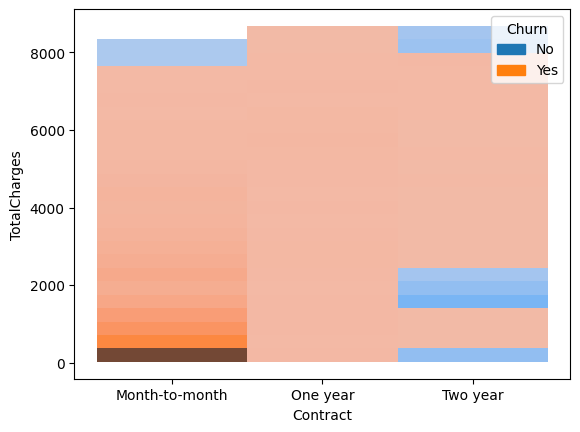

In [10]:
a  = sns.histplot(data=df,y="TotalCharges", x="Contract",hue= "Churn",common_norm= False)

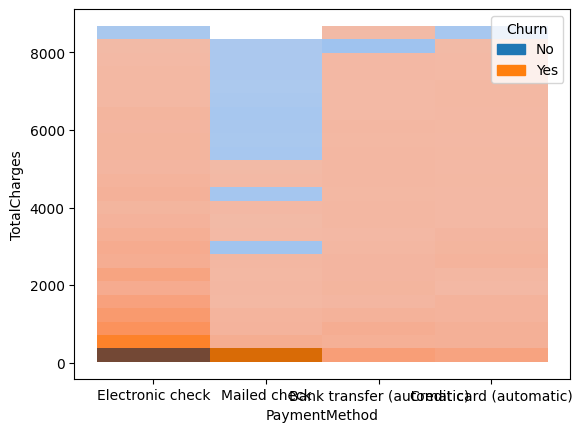

In [11]:
a  = sns.histplot(data=df,y="TotalCharges", x="PaymentMethod",hue= "Churn",common_norm= False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7032 non-null   float64
 7   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


In [27]:
churn_option = pd.get_dummies(df['Churn'],dtype='int')
churn_option.rename(columns={'No':'no_churn','Yes':'churn'},inplace=True)
churn_option.head()
df= pd.concat([df,churn_option],axis=1)
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,no_churn,churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No,1,0
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No,1,0
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes,0,1
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No,1,0
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No,1,0
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No,1,0
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No,1,0
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes,0,1


<Axes: >

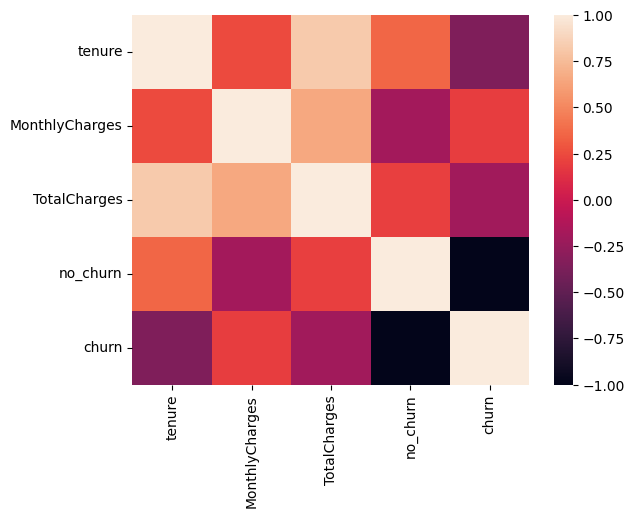

In [28]:
sns.heatmap(data = df.corr(numeric_only= True))


### * churn risk is more related to monthly charges. Not churn is more related to tenure and total charges

In [44]:
import numpy as np
bins = np.linspace(min(df['tenure']), max(df['tenure']), 12)
Monthly_price_level = ['18','28','38','48','58','68','78','88','98','108','118']
df['monthly_seperation'] = pd.cut(df['MonthlyCharges'], bins, labels = Monthly_price_level, include_lowest = True)


<Axes: xlabel='monthly_seperation,Churn'>

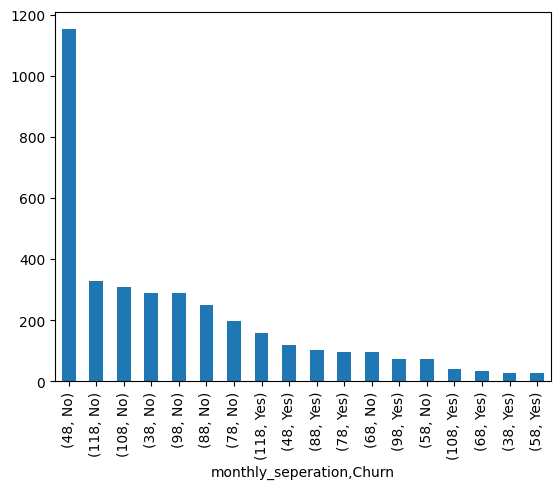

In [45]:
df.value_counts(['monthly_seperation','Churn']).plot.bar()

# Analysis:
Based on the histgrams we created on top, customers with month-to-month payments and electronic payments are more likely to churn. Customers with longer tenure and total charges are less likely to churn. One way we can do is to give more incentives for one year or two year contract.

We can also see that the more total payments, the less risk of churn. One suggested solution is give out great deals when people reach a certain total charges like how the mobile games do. E.g. 5% down every $1,000 total charges they use. Or give a $20 off on every $1000 spent. 


